### ***Link To drive***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### ***Import Libraries***

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm
import spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 95.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import nltk


### ***Load Dataset***

In [ ]:

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/mbti_1.csv")

### ***Preprocessing***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import nltk # Make sure to import nltk

from nltk.stem import WordNetLemmatizer, PorterStemmer
import re
from nltk.tokenize import word_tokenize
# Download the 'punkt' resource
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Initialize lemmatizer and stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Function to preprocess text with lemmatization and stemming
def preprocess_text_full(text):
    # Convert to lowercase
    text = text.lower()
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove special characters, digits, and punctuations
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatized = [lemmatizer.lemmatize(word) for word in tokens]
    # Stemming
    stemmed = [stemmer.stem(word) for word in lemmatized]
    # Join tokens back into string
    return ' '.join(stemmed)

# Apply full preprocessing to the 'text' column
df['full_preprocessed_text'] = df['posts'].apply(preprocess_text_full)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
posts_split = df['posts'].str.split('\|\|\|')

In [ ]:
df.head()

,type,posts,full_preprocessed_text
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,intj moment sportscent top ten play prankswhat...
1,ENTP,'I'm finding the lack of me in these posts ver...,im find lack post alarmingsex bore posit often...
2,INTP,'Good one _____ https://www.youtube.com/wat...,good one cours say know that bless cursedo abs...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",dear intp enjoy convers day esoter gab natur u...
4,ENTJ,'You're fired.|||That's another silly misconce...,your firedthat anoth silli misconcept approach...


In [ ]:
# Preprocess the text data for  traits
df['NS'] = df['posts'].apply(lambda x: x[1])
df['class'] = df['posts'].apply(lambda x: 0 if x.startswith('N') else 1)

### ***Machine Learning***

### ***Apply POS TAGGING***

In [ ]:
# Load the model for spaCy
nlp = spacy.load("en_core_web_sm")

# Function to perform POS tagging
def pos_tagging(text):
    doc = nlp(text)
    pos_tags = [token.pos_ for token in doc]
    return " ".join(pos_tags)


/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [ ]:
# Apply POS tagging to the posts
df['pos_tags'] = df['posts'].apply(pos_tagging)

X_ns = df['pos_tags']
y_ns = df['NS']

In [ ]:
# Feature extraction for all four traits
# Step 2: Feature Extraction
posts_combined = posts_split.apply(lambda x: ' '.join(x))
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_ns = tfidf_vectorizer.fit_transform(posts_combined)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import tqdm

In [ ]:
# Train-test split
X_train_ns, X_test_ns, y_train_ns, y_test_ns = train_test_split(X_ns, y_ns, test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
!pip install xgboost
import xgboost as xgb

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_ns = le.fit_transform(y_train_ns)
y_test_ns = le.transform(y_test_ns)

In [ ]:
# Define models
models = {
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression()
}

In [ ]:
# Function to train and evaluate models for a given trait
def train_and_evaluate_model(X_train, X_test, y_train, y_test, trait_name):
    print(f"Training models for {trait_name}...")
    for name, model in models.items():
        print(f"Training {name} for {trait_name}...")
        # Initialize the TfidfVectorizer
        vectorizer = TfidfVectorizer(max_features=1000)
        # Convert POS-tagged text to numerical features for training and testing data
        X_train_vectorized = vectorizer.fit_transform(X_train)
        X_test_vectorized = vectorizer.transform(X_test)

        model.fit(X_train_vectorized, y_train)
        y_pred = model.predict(X_test_vectorized)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy for {name} for {trait_name}: {accuracy}")
        print(f"Classification report for {name} for {trait_name}:")
        print(classification_report(y_test, y_pred))
        print("----------------------------------------------------")




In [ ]:
train_and_evaluate_model(X_train_ns, X_test_ns, y_train_ns, y_test_ns, "Intuition vs. Sensing")

Training models for Intuition vs. Sensing...
Training SVM for Intuition vs. Sensing...
Accuracy for SVM for Intuition vs. Sensing: 0.8582132564841498
Classification report for SVM for Intuition vs. Sensing:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1489
           1       0.00      0.00      0.00       246

    accuracy                           0.86      1735
   macro avg       0.43      0.50      0.46      1735
weighted avg       0.74      0.86      0.79      1735

----------------------------------------------------
Training Gradient Boosting for Intuition vs. Sensing...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy for Gradient Boosting for Intuition vs. Sensing: 0.8570605187319885
Classification report for Gradient Boosting for Intuition vs. Sensing:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1489
           1       0.33      0.01      0.02       246

    accuracy                           0.86      1735
   macro avg       0.60      0.50      0.47      1735
weighted avg       0.78      0.86      0.79      1735

----------------------------------------------------
Training Decision Tree for Intuition vs. Sensing...
Accuracy for Decision Tree for Intuition vs. Sensing: 0.7504322766570605
Classification report for Decision Tree for Intuition vs. Sensing:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1489
           1       0.13      0.14      0.14       246

    accuracy                           0.75      1735
   macro avg       0.50      0.49      0.49      1735
weighted

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy for XGBoost for Intuition vs. Sensing: 0.8518731988472622
Classification report for XGBoost for Intuition vs. Sensing:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1489
           1       0.28      0.03      0.05       246

    accuracy                           0.85      1735
   macro avg       0.57      0.51      0.49      1735
weighted avg       0.78      0.85      0.80      1735

----------------------------------------------------
Training AdaBoost for Intuition vs. Sensing...
Accuracy for AdaBoost for Intuition vs. Sensing: 0.8564841498559078
Classification report for AdaBoost for Intuition vs. Sensing:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1489
           1       0.33      0.01      0.02       246

    accuracy                           0.86      1735
   macro avg       0.60      0.50      0.47      1735
weighted avg       0.78      0.86      0.80

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


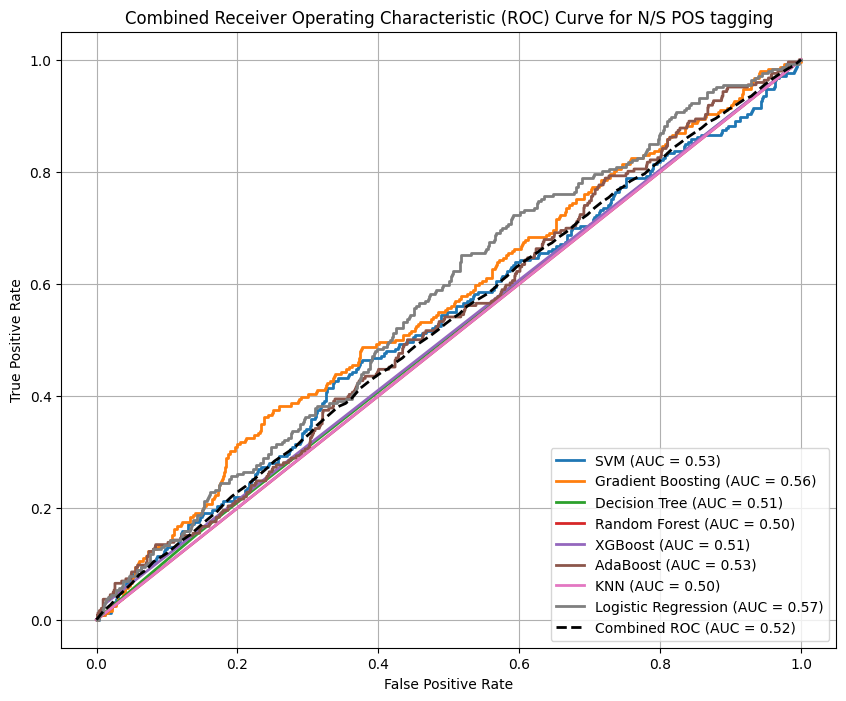

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Initialize a figure for the combined ROC curve
plt.figure(figsize=(10, 8))

# Initialize arrays to store combined false positive rates and true positive rates
all_fpr = np.linspace(0, 1, 100)
mean_tpr = 0.0


# Plot ROC curve for each classifier and calculate the mean true positive rate
for name, model in models.items():
    # Fit the model
    model.fit(X_train_vectorized, y_train_ns)

    # Get scores (decision function output) on the test set
    if hasattr(model, "decision_function"):
        scores = model.decision_function(X_test_vectorized)
    else:
        scores = model.predict(X_test_vectorized)

    # Convert scores into probabilities
    y_pred_proba = (scores - scores.min()) / (scores.max() - scores.min())

    # Compute ROC curve and ROC area for Introversion vs. Extroversion (IE) trait
    fpr, tpr, _ = roc_curve(y_test_ns, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve for the model
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

    # Calculate mean true positive rate
    mean_tpr += np.interp(all_fpr, fpr, tpr)


# Calculate the mean true positive rate across all classifiers
mean_tpr /= len(models)
mean_auc = auc(all_fpr, mean_tpr)

    # Plot the combined ROC curve
plt.plot(all_fpr, mean_tpr, color='black', linestyle='--', lw=2, label=f'Combined ROC (AUC = {mean_auc:.2f})')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Combined Receiver Operating Characteristic (ROC) Curve for N/S POS tagging')
plt.legend(loc="lower right")

# Show plot
plt.grid(True)
plt.show()



In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Initialize Naive Bayes classifier
model = MultinomialNB()

In [ ]:
accuracy_ns = accuracy_score(y_test_ns, y_pred_ns)

print("\nIntuition vs. Sensing:")
print(f"Accuracy: {accuracy_ns}")
print(classification_report(y_test_ns, y_pred_ns))

In [ ]:
# Function to train and evaluate models for a given trait
def train_and_evaluate_model(X_train, X_test, y_train, y_test, trait_name):
    print(f"Training models for {trait_name}...")
    for name, model in models.items():
        print(f"Training {name} for {trait_name}...")
        # Initialize the TfidfVectorizer
        vectorizer = TfidfVectorizer(max_features=1000)
        # Convert POS-tagged text to numerical features for training and testing data
        X_train_vectorized = vectorizer.fit_transform(X_train)
        X_test_vectorized = vectorizer.transform(X_test)

        model.fit(X_train_vectorized, y_train)
        y_pred = model.predict(X_test_vectorized)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy for {name} for {trait_name}: {accuracy}")
        print(f"Classification report for {name} for {trait_name}:")
        print(classification_report(y_test, y_pred))
        print("----------------------------------------------------")

### ***TF-IDF***

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import pandas as pd
import tqdm

In [ ]:
# Feature extraction for all four traits
# Step 2: Feature Extraction
posts_combined = posts_split.apply(lambda x: ' '.join(x))
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_ns = tfidf_vectorizer.fit_transform(posts_combined)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_ns = le.fit_transform(y_train_ns)
y_test_ns = le.transform(y_test_ns)

In [ ]:
# Define models
models = {

    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression()
}

In [ ]:
import numpy as np

# List to store accuracy scores for all models across four traits
accuracy_scores = []

# Function to train and evaluate models for a given trait
def train_and_evaluate_model(X_train, X_test, y_train, y_test, trait_name):
    print(f"Training models for {trait_name}...")
    for name, model in models.items():
        print(f"Training {name} for {trait_name}...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy for {name} for {trait_name}: {accuracy}")
        print(f"Classification report for {name} for {trait_name}:")
        print(classification_report(y_test, y_pred))
        print("----------------------------------------------------")

In [ ]:
train_and_evaluate_model(X_train_ns, X_test_ns, y_train_ns, y_test_ns, "Intuition vs. Sensing")


Training models for Intuition vs. Sensing...
Training SVM for Intuition vs. Sensing...
Accuracy for SVM for Intuition vs. Sensing: 0.8864553314121038
Classification report for SVM for Intuition vs. Sensing:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1489
           1       0.87      0.24      0.37       246

    accuracy                           0.89      1735
   macro avg       0.88      0.61      0.65      1735
weighted avg       0.88      0.89      0.86      1735

----------------------------------------------------
Training Gradient Boosting for Intuition vs. Sensing...
Accuracy for Gradient Boosting for Intuition vs. Sensing: 0.9008645533141211
Classification report for Gradient Boosting for Intuition vs. Sensing:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1489
           1       0.81      0.39      0.53       246

    accuracy                           0.90  

In [ ]:
!pip install scikit-learn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
for model in models.values():
    model.probability = True

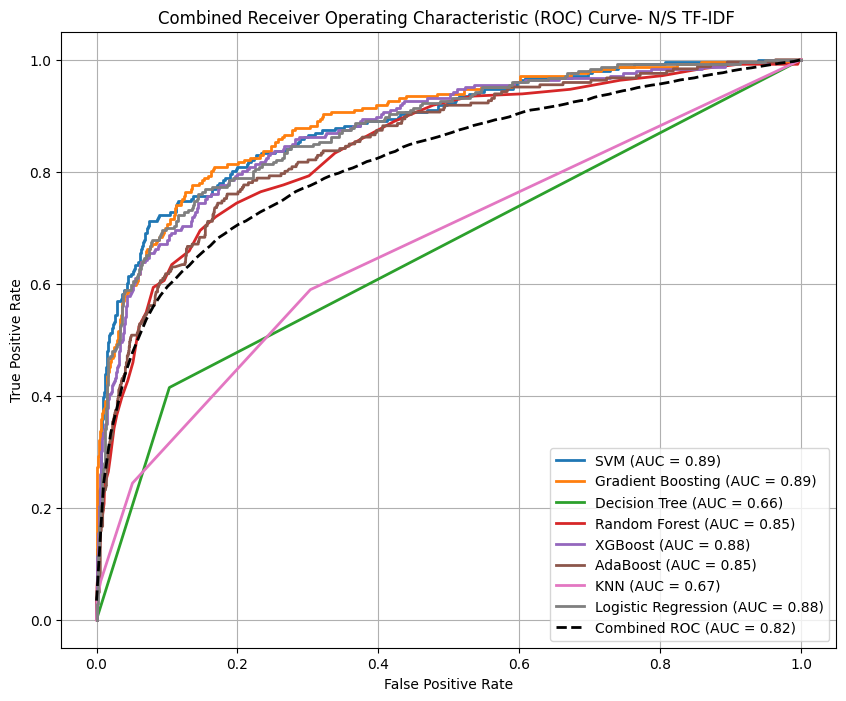

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Initialize a figure for the combined ROC curve
plt.figure(figsize=(10, 8))

# Initialize arrays to store combined false positive rates and true positive rates
all_fpr = np.linspace(0, 1, 100)
mean_tpr = 0.0

# Plot ROC curve for each classifier and calculate the mean true positive rate
for name, model in models.items():
    model.fit(X_train_ns, y_train_ns)
    y_score = model.predict_proba(X_test_ns)[:, 1]
    fpr, tpr, _ = roc_curve(y_test_ns, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')
    mean_tpr += np.interp(all_fpr, fpr, tpr)

# Calculate the mean true positive rate across all classifiers
mean_tpr /= len(models)
mean_auc = auc(all_fpr, mean_tpr)

# Plot the combined ROC curve
plt.plot(all_fpr, mean_tpr, color='black', linestyle='--', lw=2, label=f'Combined ROC (AUC = {mean_auc:.2f})')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Combined Receiver Operating Characteristic (ROC) Curve- N/S TF-IDF ')
plt.legend(loc="lower right")

# Show plot
plt.grid(True)
plt.show()


### ***EDA***

In [ ]:
df['full_preprocessed_text'] = df['posts'].apply(preprocess_text_full)

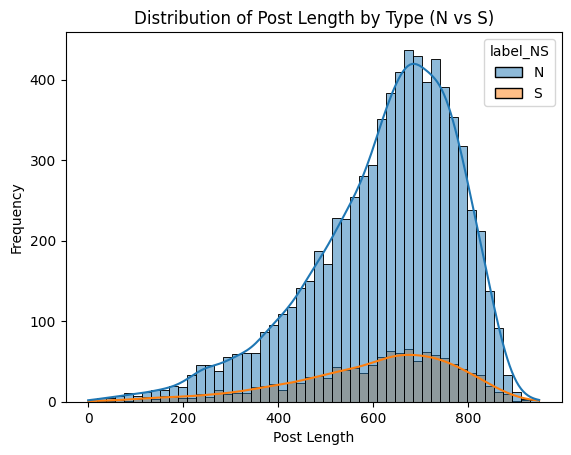

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataset for labels 'N' and 'S'
df['label_NS'] = df['type'].apply(lambda x: 'N' if 'N' in x else ('S' if 'S' in x else np.nan))
data_NS = df.dropna(subset=['label_NS'])

# Text length analysis for labels 'N' and 'S'
data_NS['post_length'] = data_NS['full_preprocessed_text'].apply(lambda x: len(x.split()))

# Plot the distribution of post length by type
sns.histplot(data=data_NS, x='post_length', hue='label_NS', bins=50, kde=True)
plt.title('Distribution of Post Length by Type (N vs S)')
plt.xlabel('Post Length')
plt.ylabel('Frequency')
plt.show()


ERROR: You must give at least one requirement to install (see "pip help install")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   type           8675 non-null   object
 1   posts          8675 non-null   object
 2   cleaned_posts  8675 non-null   object
dtypes: object(3)
memory usage: 203.4+ KB
None
        type                                              posts  \
count   8675                                               8675   
unique    16                                               8675   
top     INFP  'It has been too long since I have been on per...   
freq    1832                                                  1   

                                            cleaned_posts  
count                                                8675  
unique                                               8675  
top     long personalitycafe changed bit say good like...  
freq                                                    

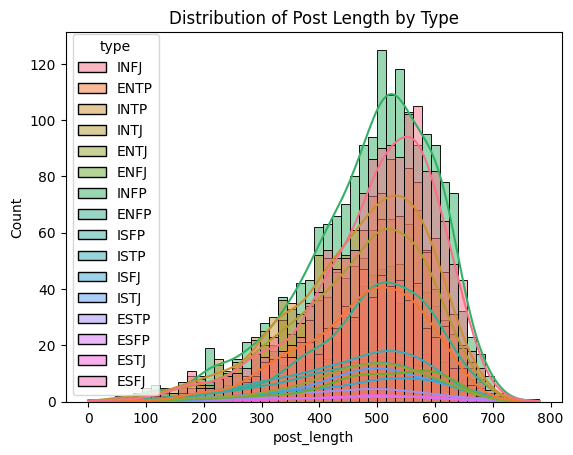

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import spacy
!pip install
import nltk
nltk.download('punkt')

# Load dataset
data = pd.read_csv("/content/drive/MyDrive/mbti_1.csv")

# Download stopwords
nltk.download('stopwords')

# Load Spacy's English language model
nlp = spacy.load('en_core_web_sm')

# Combine NLTK and sklearn stopwords
stop_words = set(stopwords.words('english')).union(set(ENGLISH_STOP_WORDS))

# Filter posts related to 'N' and 'S' labels
n_posts = data[data['type'].str.contains('N')]['posts']
s_posts = data[data['type'].str.contains('S')]['posts']

# Function to preprocess text
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in stop_words and token.isalpha()]
    return " ".join(tokens)

# Preprocess the posts
data['cleaned_posts'] = data['posts'].apply(preprocess_text)
n_posts_cleaned = n_posts.apply(preprocess_text)
s_posts_cleaned = s_posts.apply(preprocess_text)

# Basic data inspection
print(data.info())
print(data.describe())

# Text length analysis
data['post_length'] = data['cleaned_posts'].apply(lambda x: len(x.split()))
sns.histplot(data=data, x='post_length', hue='type', bins=50, kde=True)
plt.title('Distribution of Post Length by Type')
plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


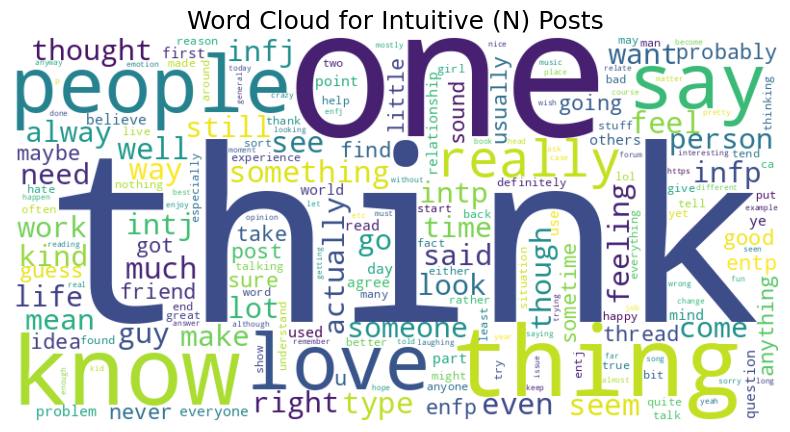

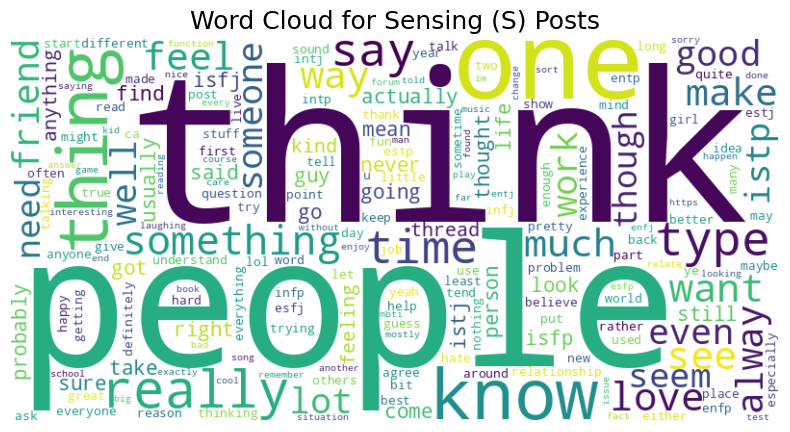

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download necessary resources
nltk.download('punkt')
nltk.download('stopwords')

# Load dataset
data = pd.read_csv("/content/drive/MyDrive/mbti_1.csv")

# Combine NLTK and sklearn stopwords
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in stop_words and token.isalpha()]
    return " ".join(tokens)

# Preprocess the posts
data['cleaned_posts'] = data['posts'].apply(preprocess_text)

# Filter posts related to 'N' and 'S' labels
n_posts_cleaned = data[data['type'].str.contains('N')]['cleaned_posts']
s_posts_cleaned = data[data['type'].str.contains('S')]['cleaned_posts']

# Generate word clouds
def create_wordcloud(text_data, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(text_data))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=18)
    plt.axis('off')
    plt.show()

# Create word clouds for 'N' and 'S' posts
create_wordcloud(n_posts_cleaned, 'Word Cloud for Intuitive (N) Posts')
create_wordcloud(s_posts_cleaned, 'Word Cloud for Sensing (S) Posts')


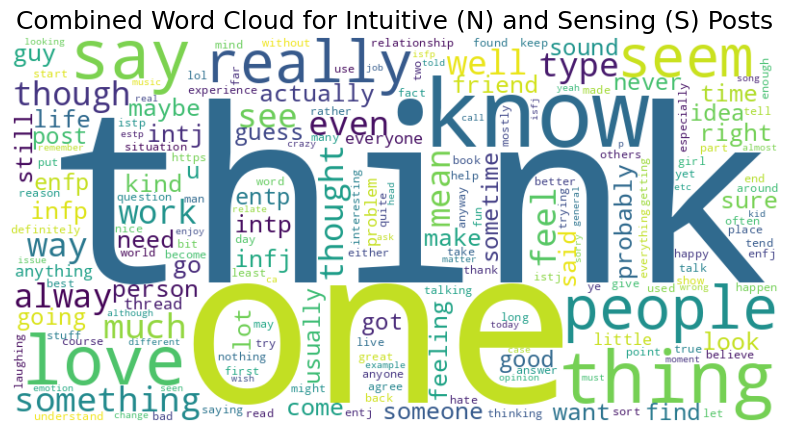

In [ ]:
# Filter posts related to 'N' and 'S' labels
ns_posts_cleaned = data[data['type'].str.contains('N|S')]['cleaned_posts']

# Combine all posts into a single string
combined_text_ns = " ".join(ns_posts_cleaned)

# Generate and display the word cloud
wordcloud_ns = WordCloud(width=800, height=400, background_color='white').generate(combined_text_ns)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_ns, interpolation='bilinear')
plt.title('Combined Word Cloud for Intuitive (N) and Sensing (S) Posts', fontsize=18)
plt.axis('off')
plt.show()


### ***DL MODELS***

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Embedding, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from gensim.models import Word2Vec
from torchtext.vocab import GloVe
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer


/usr/local/lib/python3.10/dist-packages/torchtext/vocab/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/usr/local/lib/python3.10/dist-packages/torchtext/utils.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [ ]:
import pandas as pd
import json
import re
import numpy as np
import spacy
import tqdm
import xgboost as xgb
import lightgbm as lgb
import nltk
!pip install emoji
import emoji

!pip install catboost
from catboost import CatBoostClassifier # This is where CatBoostClassifier is defined

# Download NLTK data for tokenization
nltk.download('punkt')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier # Remove CatBoostClassifier from here
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from nltk import pos_tag, word_tokenize
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
# Download NLTK data
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.2 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, GRU, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, SimpleRNN
from tensorflow.keras.optimizers import Adam
from gensim.models import Word2Vec, KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models.fasttext import FastText
import transformers
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Embedding, Dropout
from torchtext.vocab import GloVe
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer


In [ ]:
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
# Preprocess text (simple preprocessing considering only removal of URLs and lowercasing)
data['posts'] = data['posts'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
data['posts'] = data['posts'].str.lower()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['posts'], data['class'], test_size=0.2, random_state=42)

In [ ]:
# Train-test split
X_train_ns, X_test_ns, y_train_ns, y_test_ns = train_test_split(X_ns, y_ns, test_size=0.2, random_state=42)

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_ns)
X_train_seq = tokenizer.texts_to_sequences(X_train_ns)
X_test_seq = tokenizer.texts_to_sequences(X_test_ns)

# Pad sequences to ensure uniform input size
X_train_pad = pad_sequences(X_train_seq, maxlen=100)
X_test_pad = pad_sequences(X_test_seq, maxlen=100)


In [ ]:
# Train a Word2Vec model
sentences = [sentence.split() for sentence in X_train_ns]
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Create an embedding matrix
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, 100))
for word, i in tokenizer.word_index.items():
    embedding_vector = w2v_model.wv[word] if word in w2v_model.wv else None
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


In [ ]:
# Load the GloVe model
glove = GloVe(name='6B', dim=100)

# Create an embedding matrix for Glove
embedding_matrix_glove = np.zeros((len(tokenizer.word_index) + 1, 100))
for word, i in tokenizer.word_index.items():
    embedding_vector = glove[word]
    if embedding_vector is not None:
        embedding_matrix_glove[i] = embedding_vector


.vector_cache/glove.6B.zip: 862MB [02:39, 5.40MB/s]                           
100%|█████████▉| 399999/400000 [00:20<00:00, 19647.35it/s]


In [ ]:
print(type(X_train_ns))
print(type(X_test_ns))
X_train_ns = X_train_ns.tolist()
X_test_ns = X_test_ns.tolist()


<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [ ]:
# Initialize Sentence Transformer Model
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

# Encode sentences (for simplification we use mean pooling of embeddings)
X_train_embeddings = sbert_model.encode(X_train_ns, show_progress_bar=True)
X_test_embeddings = sbert_model.encode(X_test_ns, show_progress_bar=True)

Batches:   0%|          | 0/217 [00:00<?, ?it/s]

Batches:   0%|          | 0/55 [00:00<?, ?it/s]

In [ ]:
def build_model(embedding_matrix, lstm_type='lstm'):
    model = Sequential()
    model.add(Embedding(input_dim=embedding_matrix.shape[0], output_dim=100,
                        weights=[embedding_matrix], trainable=False))
    if lstm_type == 'lstm':
        model.add(LSTM(100))
    elif lstm_type == 'bilstm':
        model.add(Bidirectional(LSTM(100)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
# Check the data types of your target variable
print(y_train_ns.dtype)

# Check for string values in your features (after padding)
print(np.unique(X_train_pad))

# If you find string values, you need to convert them to numerical representations.
# For example, if the padding token is a string, you can convert it to an integer:

X_train_pad = np.where(X_train_pad == 'your_padding_token', 0, X_train_pad).astype(np.float32)
X_test_pad = np.where(X_test_pad == 'your_padding_token', 0, X_test_pad).astype(np.float32)

# If your target variable contains strings, you need to encode them numerically (e.g., using label encoding or one-hot encoding)

In [ ]:
# LSTM Model
model_w2v_lstm = build_model(embedding_matrix, 'lstm')
model_w2v_lstm.fit(X_train_pad, y_train_ns, epochs=35, batch_size=64, validation_data=(X_test_pad, y_test_ns))

In [ ]:
!pip install sklearn.metrics
from sklearn.metrics import classification_report

In [ ]:
# Predict probabilities for each class for the test data using the trained LSTM model
y_pred_probs_lstm = model_w2v_lstm.predict(X_test_pad)

# Convert probabilities to class labels
y_pred_lstm = (y_pred_probs_lstm > 0.5).astype(int)

# Generate and print the classification report
classification_report_lstm = classification_report(y_test, y_pred_lstm)
print("Classification Report for LSTM Model:")
print(classification_report_lstm)


In [ ]:
# Bi-LSTM Model
model_w2v_bilstm = build_model(embedding_matrix, 'bilstm')
model_w2v_bilstm.fit(X_train_pad, y_train, epochs=35, batch_size=64, validation_data=(X_test_pad, y_test))

In [ ]:
# Predict probabilities for each class for the test data using the trained Bi-LSTM model
y_pred_probs_bilstm = model_w2v_bilstm.predict(X_test_pad)

# Convert probabilities to class labels
y_pred_bilstm = (y_pred_probs_bilstm > 0.5).astype(int)

# Generate and print the classification report
classification_report_bilstm = classification_report(y_test, y_pred_bilstm)
print("Classification Report for Bi-LSTM Model:")
print(classification_report_bilstm)


In [ ]:

# CNN Model with GloVe
lstm_model_glove = build_lstm_model(embedding_matrix_glove)
lstm_model_glove.fit(X_train_pad, y_train, epochs=35, batch_size=64, validation_data=(X_test_pad, y_test))


In [ ]:
from sklearn.metrics import classification_report

# Predict probabilities for each class for the test data using the trained  model
y_pred_probs = lstm_model_glove.predict(X_test_pad)

# Convert probabilities to class labels
y_pred = (y_pred_probs > 0.5).astype(int)

# Generate and print the classification report
classification_report_lstm = classification_report(y_test, y_pred)
print("Classification Report for CNN Model with GloVe:")
print(classification_report_lstm)


In [ ]:
# lstm Model with Sentence Embeddings
lstm_model_sentence = build_lstm_model(None)  # No embedding layer needed
lstm_model_sentence.fit(X_train_embeddings, y_train, epochs=35, batch_size=64, validation_data=(X_test_embeddings, y_test))

### ***BERT***

In [ ]:
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased", max_length=512)

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DistilBertTokenizer'. 
The class this function is called from is 'BertTokenizerFast'.


In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=NUM_LABELS, id2label=id2label, label2id=label2id)
model.to(device)

You are using a model of type distilbert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing BertForSequenceClassification: ['distilbert.transformer.layer.1.output_layer_norm.weight', 'distilbert.transformer.layer.5.ffn.lin2.bias', 'distilbert.transformer.layer.4.attention.q_lin.weight', 'distilbert.transformer.layer.5.attention.q_lin.bias', 'distilbert.transformer.layer.3.ffn.lin1.bias', 'distilbert.transformer.layer.5.ffn.lin1.weight', 'distilbert.transformer.layer.0.ffn.lin1.weight', 'distilbert.transformer.layer.1.ffn.lin2.weight', 'distilbert.transformer.layer.2.output_layer_norm.bias', 'distilbert.transformer.layer.4.output_layer_norm.weight', 'distilbert.transformer.layer.0.ffn.lin1.bias', 'distilbert.transformer.layer.5.ffn.lin2.weight', 'distilbert.transformer.layer.3.output_layer_norm.weight', 'distilbert.transformer.lay

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
SIZE= data.shape[0]

train_texts= list(data.posts[:SIZE//2])

val_texts=   list(data.posts[SIZE//2:(3*SIZE)//4 ])

test_texts=  list(data.posts[(3*SIZE)//4:])

train_labels= list(data.labels[:SIZE//2])

val_labels=   list(data.labels[SIZE//2:(3*SIZE)//4])

test_labels=  list(data.labels[(3*SIZE)//4:])

In [ ]:
len(train_texts), len(val_texts), len(test_texts)

(4337, 2169, 2169)

In [ ]:
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings  = tokenizer(val_texts, truncation=True, padding=True)
test_encodings = tokenizer(test_texts, truncation=True, padding=True)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [ ]:
class DataLoader(Dataset):
    """
    Custom Dataset class for handling tokenized text data and corresponding labels.
    Inherits from torch.utils.data.Dataset.
    """
    def __init__(self, encodings, labels):
        """
        Initializes the DataLoader class with encodings and labels.

        Args:
            encodings (dict): A dictionary containing tokenized input text data
                              (e.g., 'input_ids', 'token_type_ids', 'attention_mask').
            labels (list): A list of integer labels for the input text data.
        """
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        """
        Returns a dictionary containing tokenized data and the corresponding label for a given index.

        Args:
            idx (int): The index of the data item to retrieve.

        Returns:
            item (dict): A dictionary containing the tokenized data and the corresponding label.
        """
        # Retrieve tokenized data for the given index
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        # Add the label for the given index to the item dictionary
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        """
        Returns the number of data items in the dataset.

        Returns:
            (int): The number of data items in the dataset.
        """
        return len(self.labels)

In [ ]:
train_dataloader = DataLoader(train_encodings, train_labels)

val_dataloader = DataLoader(val_encodings, val_labels)

test_dataset = DataLoader(test_encodings, test_labels)

In [ ]:
from transformers import TrainingArguments, Trainer

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    """
    Computes accuracy, F1, precision, and recall for a given set of predictions.

    Args:
        pred (obj): An object containing label_ids and predictions attributes.
            - label_ids (array-like): A 1D array of true class labels.
            - predictions (array-like): A 2D array where each row represents
              an observation, and each column represents the probability of
              that observation belonging to a certain class.

    Returns:
        dict: A dictionary containing the following metrics:
            - Accuracy (float): The proportion of correctly classified instances.
            - F1 (float): The macro F1 score, which is the harmonic mean of precision
              and recall. Macro averaging calculates the metric independently for
              each class and then takes the average.
            - Precision (float): The macro precision, which is the number of true
              positives divided by the sum of true positives and false positives.
            - Recall (float): The macro recall, which is the number of true positives
              divided by the sum of true positives and false negatives.
    """
    # Extract true labels from the input object
    labels = pred.label_ids

    # Obtain predicted class labels by finding the column index with the maximum probability
    preds = pred.predictions.argmax(-1)

    # Compute macro precision, recall, and F1 score using sklearn's precision_recall_fscore_support function
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')

    # Calculate the accuracy score using sklearn's accuracy_score function
    acc = accuracy_score(labels, preds)

    # Return the computed metrics as a dictionary
    return {
        'Accuracy': acc,
        'F1': f1,
        'Precision': precision,
        'Recall': recall
    }

In [ ]:
import os
os.listdir('../models_output/text_clf')

['checkpoint-500']

In [ ]:
training_args = TrainingArguments(
    # The output directory where the model predictions and checkpoints will be written
    output_dir='../models_output/text_clf',
    do_train=True,
    do_eval=True,
    #  The number of epochs, defaults to 3.0
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    # Number of steps used for a linear warmup
    warmup_steps=100,
    weight_decay=0.01,
    logging_strategy='steps',
   # TensorBoard log directory
    logging_dir='./multi-class-logs',
    logging_steps=50,
    evaluation_strategy="steps",
    eval_steps=50,
    save_strategy="steps",
    fp16=True,
    load_best_model_at_end=True
)

In [ ]:
trainer = Trainer(
    # the pre-trained model that will be fine-tuned
    model=model,
     # training arguments that we defined above
    args=training_args,
    train_dataset=train_dataloader,
    eval_dataset=val_dataloader,
    compute_metrics= compute_metrics
)

In [ ]:
trainer.train()